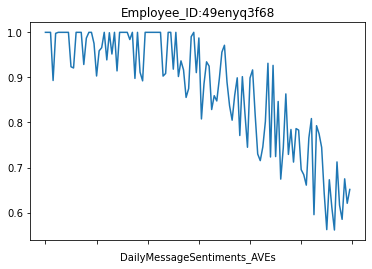

In [43]:
# Drawing Figure 1.7

import pandas as pd
import matplotlib.pyplot as plt

employee_df = pd.read_csv('data/employee_simulated.csv')

y = employee_df.loc[0,'DailyMessageSentiments_AVE_day0':'DailyMessageSentiments_AVE_day119']
ax = y.plot()
ax.set_xticklabels([])
ax.set_xlabel('DailyMessageSentiments_AVEs')
ax.set_title(f'Employee_ID:{employee_df.loc[0,"Employee_ID"]}')
plt.savefig(f'images/DailyMessageSentiments_AVEs_Employee_ID_{employee_df.loc[0,"Employee_ID"]}.png',dpi=500)

In [10]:
# Drawing Figure 1.8

import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt

def r2(y,y_fit):
    TSS = (y**2).sum()
    RSS = ((y-y_fit)**2).sum()
    return 1- RSS/TSS

def func1par(x,p1):
    return p1 + x*0

def func2par(x,p1,p2):
    return p1 + p2*x

def func3par(x,p1,p2,p3):
    return p1 + p2*x + p3*x**2

funcs = [func1par,func2par,func3par]

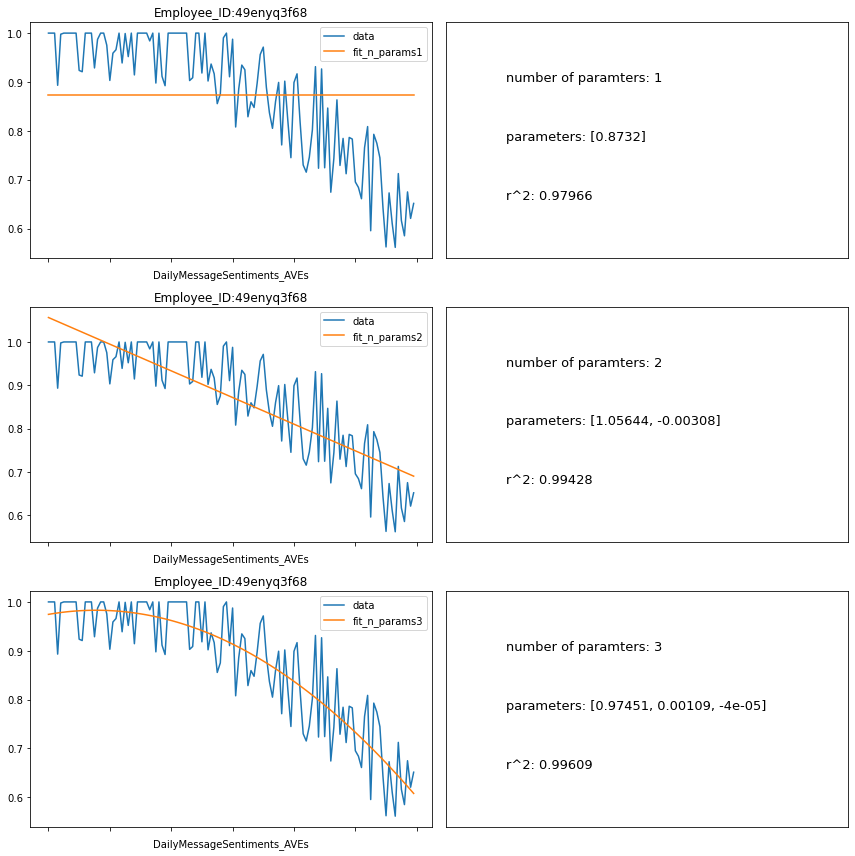

In [44]:
employee_df = pd.read_csv('data/employee_simulated.csv')

y = employee_df.loc[0,'DailyMessageSentiments_AVE_day0':'DailyMessageSentiments_AVE_day119']
x = np.arange(len(y))

fig,axs = plt.subplots(3,2,figsize=(12,12))

for i in range(3):
    ps, _ = curve_fit(funcs[i], x, y)
    
    if i == 0:
        y_fit = funcs[i](x,ps[0])
    if i == 1:
        y_fit = funcs[i](x,ps[0],ps[1])
    if i == 2:
        y_fit = funcs[i](x,ps[0],ps[1],ps[2])
        
    r2_score = r2(y,y_fit)
    
    ax = axs[i,0]
    
    y.plot(label='data',ax=ax)
    ax.plot(x,y_fit, label=f'fit_n_params{i+1}')
    
    ax.set_xticklabels([])
    ax.set_xlabel('DailyMessageSentiments_AVEs')
    ax.set_title(f'Employee_ID:{employee_df.loc[0,"Employee_ID"]}')
    ax.legend()
    
    ax = axs[i,1]
    
    
    ax.annotate(xy=(0.15,0.75),text=f'number of paramters: {i+1}',size=13)
    ax.annotate(xy=(0.15,0.5),text=f'parameters: {str([np.round(p,5) for p in ps])}',size=13)
    ax.annotate(xy=(0.15,0.25),text=f'r^2: {np.round(r2_score,5)}',size=13)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.savefig(f'images/Feature_Extraction_Employee_ID_{employee_df.loc[0,"Employee_ID"]}.png',dpi=500)
    

In [51]:
# Drawing Figure 1.9
import pandas as pd
import matplotlib.pyplot as plt

employee_df = pd.read_csv('data/employee_simulated.csv')

fig,axes = plt.subplots(2,1, figsize=(10,5))

ax = axes[0]
employee_df.BaseSalary.plot.box(vert=False,ax=ax)

ax = axes[1]
employee_df.BaseSalary.plot.hist(bins=100)

plt.tight_layout()

plt.savefig(f'images/base_salary_boxplot_histogram.png',dpi=500)

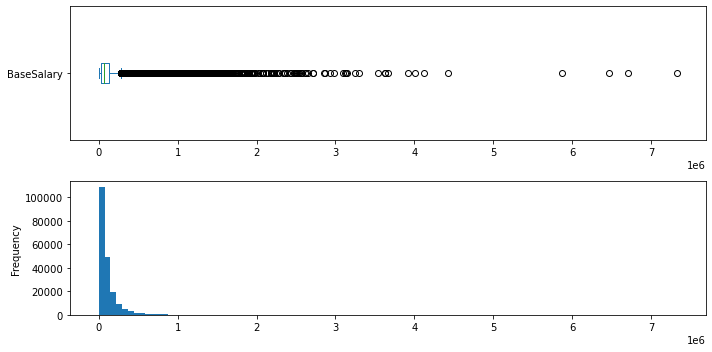

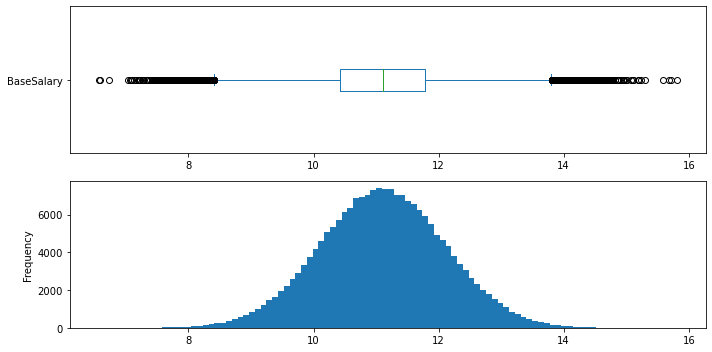

In [3]:
# Drawing Figure 1.10
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

employee_df = pd.read_csv('data/employee_simulated.csv')

fig,axes = plt.subplots(2,1, figsize=(10,5))

ax = axes[0]
np.log(employee_df.BaseSalary).plot.box(vert=False,ax=ax)

ax = axes[1]
np.log(employee_df.BaseSalary).plot.hist(bins=100)

plt.tight_layout()

plt.savefig(f'images/base_salary_log_transformed_boxplot_histogram.png',dpi=500)